In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import tensorflow as tf

/Users/xxue/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


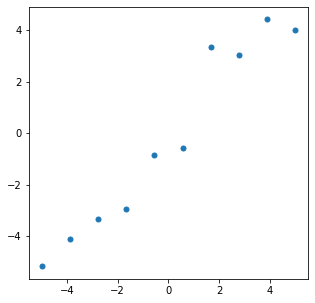

In [88]:
n_x = 10
x1 = np.linspace(-5,5,n_x)
x2 = x1 + 1*np.random.randn(n_x)

plt.figure(figsize=(5,5))
plt.plot(x1,x2,'.',markersize=10)
plt.show()

In [115]:
X = np.vstack((x2,x1)).T
X.shape

(10, 2)

In [116]:
pca = PCA(1)
pca.fit(X)

X_new = pca.transform(X)

In [119]:
pca.components_[0,1]/pca.components_[0,0]

0.9193791365725621

In [97]:
d_sum = 0
m = 1
for i in range(n_x):
    d_sum += np.abs(m*x1[i] - x2[i])/np.sqrt(np.power(m,1) + 1)
d_sum

5.027376843781695

In [107]:
a = tf.Variable(1.0)
b = tf.Variable(1.0)
c = tf.Variable(0.0)

@tf.function
def sum_dist():
    d = 0
    for i in range(n_x):
        d += tf.square(tf.abs(a*x1[i] + b*x2[i] + c)/tf.sqrt(tf.pow(a,2.0) + tf.pow(b,2.0)))
    return d

In [111]:
opt = tf.optimizers.Adam(learning_rate=0.001)
for k in range(500):
    if np.mod(k,50)==0:
        print('iteration = {:d}, cost = {:.2f}'.format(k,sum_dist().numpy()))
    opt.minimize(sum_dist,var_list=[a,b,c])

iteration = 0, cost = 9.49
iteration = 50, cost = 6.06
iteration = 100, cost = 4.23
iteration = 150, cost = 3.47
iteration = 200, cost = 3.23
iteration = 250, cost = 3.18
iteration = 300, cost = 3.17
iteration = 350, cost = 3.17
iteration = 400, cost = 3.17
iteration = 450, cost = 3.17


In [113]:
-b.numpy()/a.numpy()

0.91936874

In [87]:
b

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-1.2435484>